<a href="https://colab.research.google.com/github/siddharthlanke/oasis_task_3/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
dataset = pd.read_csv('/content/Advertising.csv')
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
dataset = dataset.drop(columns="Unnamed: 0")

In [4]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: >

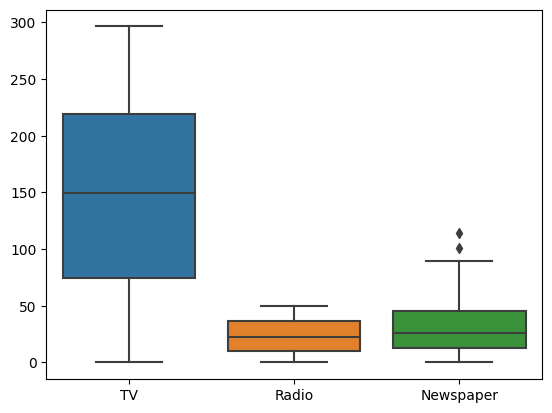

In [6]:
x = dataset[['TV','Radio','Newspaper']]
sns.boxplot(data = x)

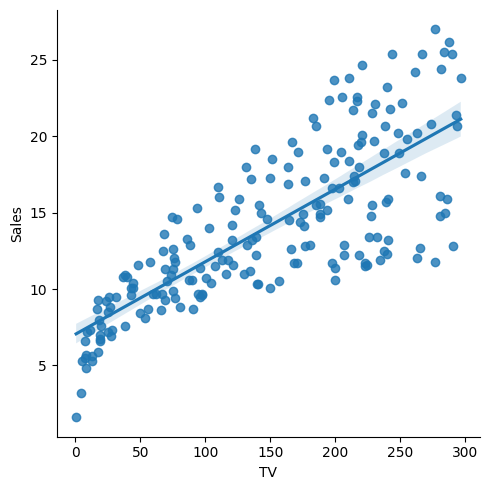

In [7]:
sns.lmplot(data=dataset,x='TV',y="Sales")

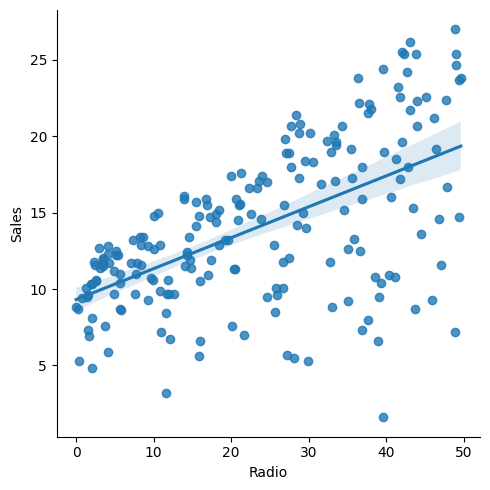

In [8]:
sns.lmplot(data=dataset,x='Radio',y="Sales")

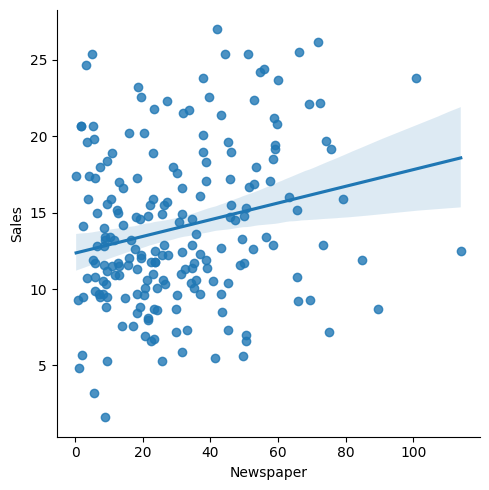

In [9]:
sns.lmplot(data=dataset,x='Newspaper',y="Sales")

In [10]:
x = dataset[['TV','Radio','Newspaper']]
y = dataset['Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

Applying Linear Regression model

In [11]:
model=LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)

In [12]:
act_predict=pd.DataFrame({
    'Actual Sales':y_test.values.flatten(),
    'Predict Sales':y_predict.flatten()
})
act_predict.head(10)

,Actual Sales,Predict Sales
0,23.8,21.735772
1,16.6,16.456938
2,9.5,7.659932
3,14.8,17.892027
4,17.6,18.677307
5,25.5,23.862719
6,16.9,16.336236
7,12.9,13.456492
8,10.5,9.177296
9,17.1,17.360562


<Axes: title={'center': 'Actual vs Predicted sales'}>

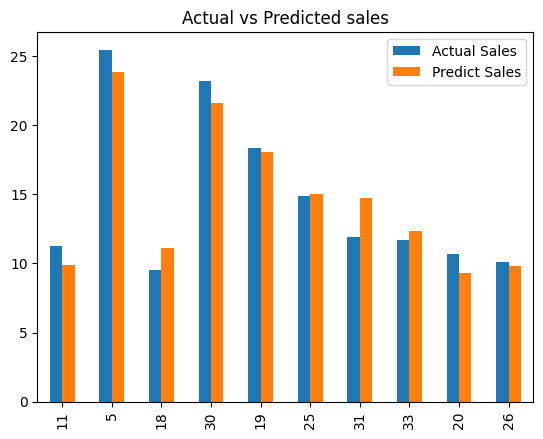

In [13]:
act_predict.sample(10).plot(kind='bar', title = 'Actual vs Predicted sales')

Evaluating the model using k-Fold cross validation

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Create a k-Fold cross validation object
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Run k-Fold cross validation
scores = cross_val_score(model, x, y, cv=5)

# Print the average accuracy across all folds
print("Average accuracy: {:.2f}".format(scores.mean()))

# Convert the scores to percentages and print them
print("Accuracy scores (as percentages):", [score * 100 for score in scores])

# Print the average accuracy across all folds as a percentage
average_accuracy = scores.mean() * 100
print("Average accuracy (as percentage): {:.2f}%".format(average_accuracy))

Average accuracy: 0.89
Accuracy scores (as percentages): [87.8651980483134, 91.76321165614462, 92.93303235799652, 81.44390391722338, 89.54782879224385]
Average accuracy (as percentage): 88.71%
